!pip install opendatasets

!kaggle datasets download -d "jp797498e/twitter-entity-sentiment-analysis"

In [12]:
import zipfile

with zipfile.ZipFile('twitter-entity-sentiment-analysis.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [1]:
import pandas as pd
import numpy as np

column_names = [ 'id', 'topic', 'sentiment', 'text']
df=pd.read_csv("data/twitter_training.csv", names=column_names)
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.drop('id',axis = 1,inplace=True)

In [3]:
df.head()

,topic,sentiment,text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
#Data Preprocessing
df['sentiment']=df['sentiment'].str.lower()
df.head()

,topic,sentiment,text
0,Borderlands,positive,im getting on borderlands and i will murder yo...
1,Borderlands,positive,I am coming to the borders and I will kill you...
2,Borderlands,positive,im getting on borderlands and i will kill you ...
3,Borderlands,positive,im coming on borderlands and i will murder you...
4,Borderlands,positive,im getting on borderlands 2 and i will murder ...


In [7]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
exclude=string.punctuation
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

text='okay, so. this, is/ just a, text, with. punc'
remove_punc(text)

'okay so this is just a text with punc'

!pip install nltk

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


#Function to preprocess text
def preprocess_text(text):
    #removing the punctuation, numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '',text,re.I|re.A)
    
    #Convert to lowercase
    text = text.lower()
    #Tokenize the text
    tokens = text.split()
    
    #Remove the stop words do stemming
    tokens =  [stemmer.stem(word) for word in tokens if word not in stop_words]
    return  ' '.join(tokens)

In [12]:
df['preprocessed_text']=df['text'].apply(preprocess_text)
print(df[['text','preprocessed_text']].head())

                                                text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

           preprocessed_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(df['preprocessed_text'])
y = df['sentiment']
print(X.shape,y.shape)

(73996, 5000) (73996,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])
vocab = vectorizer.get_feature_names_out()
print(vocab)

['aa' 'aaa' 'aaaaaaaaaaaa' ... 'zzmhpax' 'zzvfsrhewg' 'zzz']


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',splitter = "random")
clf.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

0.785440785620974


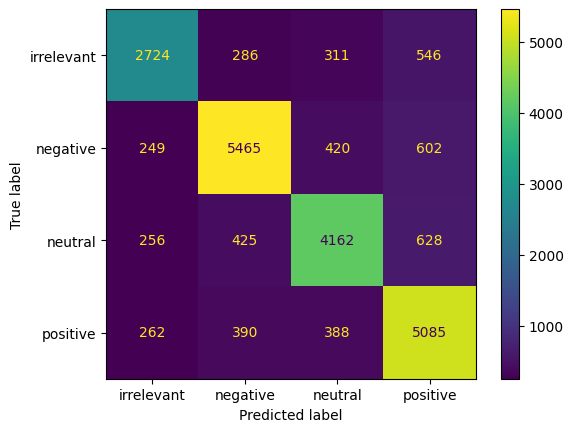

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [18]:
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)

    # Transform the preprocessed text into TF-IDF vectors
    X_new = vectorizer.transform([preprocessed_text])

    # Make predictions
    predicted_sentiment = clf.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [19]:
predict_sentiment("Its beyond me")

Predicted sentiment: ['positive']
